In [23]:
from fastbook import *

searches = 'boat', 'dutch_traditional_clothing'
path = Path('dutch_traditional_clothing')

if not path.exists():
    path.mkdir()
    for o in searches:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(o, max_images=200)
        download_images(dest, urls=results)

In [24]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#11) [None,None,None,None,None,None,None,None,None,None...]

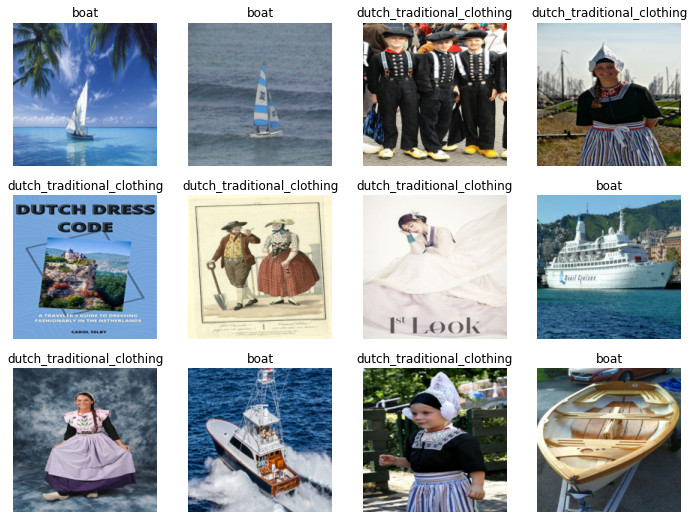

In [25]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=12)

In [27]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [40]:
is_boat,_,probs = learn.predict(PILImage.create('./images/volendam.jpg'))
print(f"Is this a boat?: {is_boat}.")
print(f"Probability it's a boat: {probs[1].item():.6f}")

Is this a boat?: boat.
Probability it's a boat: 0.250974
